In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [2]:
import pandas as pd
from pandas import DataFrame

In [3]:
import sys
#print(sys.path)

In [4]:
#sys.path.append('./Lasagne')
#import minerva_ann_datasets

In [5]:
DIR_PATH = '/Users/perdue/Documents/MINERvA/AI/hdf5/'

In [6]:
f = h5py.File(DIR_PATH + 'hadmultkineimgs_127x94_me1Amc_tiny.hdf5', 'r')

for group in f:
    for dset in f[group]:
        print '{:>10}/{:<16} - {:>8} {}'.format(group, dset, np.dtype(f[group][dset]), np.shape(f[group][dset]))

event_data/eventids         -   uint64 (35, 1)
event_data/eventids_a       -   uint32 (35, 1)
event_data/eventids_b       -   uint32 (35, 1)
event_data/planecodes       -   uint16 (35, 1)
event_data/segments         -    uint8 (35, 1)
event_data/zs               -  float32 (35, 1)
  gen_data/Q2               -  float32 (35, 1)
  gen_data/W                -  float32 (35, 1)
  gen_data/current          -   uint32 (35, 1)
  gen_data/int_type         -   uint32 (35, 1)
  gen_data/targetZ          -   uint32 (35, 1)
  gen_data/x                -  float32 (35, 1)
  gen_data/y                -  float32 (35, 1)
hadro_data/esum_chgdkaons   -  float32 (35, 1)
hadro_data/esum_chgdpions   -  float32 (35, 1)
hadro_data/esum_hadmultmeas -  float32 (35, 1)
hadro_data/esum_neutpions   -  float32 (35, 1)
hadro_data/esum_neutrons    -  float32 (35, 1)
hadro_data/esum_others      -  float32 (35, 1)
hadro_data/esum_protons     -  float32 (35, 1)
hadro_data/n_chgdkaons      -   uint32 (35, 1)
hadro_data/n_

In [7]:
data = {'n-protons': f['hadro_data']['n_protons'][:,0],
        'n-pions': f['hadro_data']['n_chgdpions'][:,0],
        'n-kaons': f['hadro_data']['n_chgdkaons'][:,0],
        'n-hadmultmeas': f['hadro_data']['n_hadmultmeas'][:,0]}
df = DataFrame(data)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
n-hadmultmeas    35 non-null uint32
n-kaons          35 non-null uint32
n-pions          35 non-null uint32
n-protons        35 non-null uint32
dtypes: uint32(4)
memory usage: 632.0 bytes


In [9]:
print np.min(df['n-hadmultmeas']), np.max(df['n-hadmultmeas'])

0 10


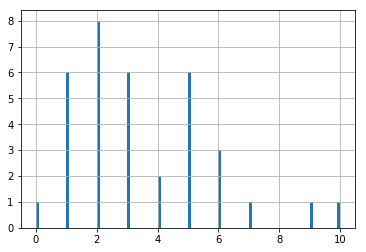

In [10]:
df['n-hadmultmeas'].hist(bins=100)

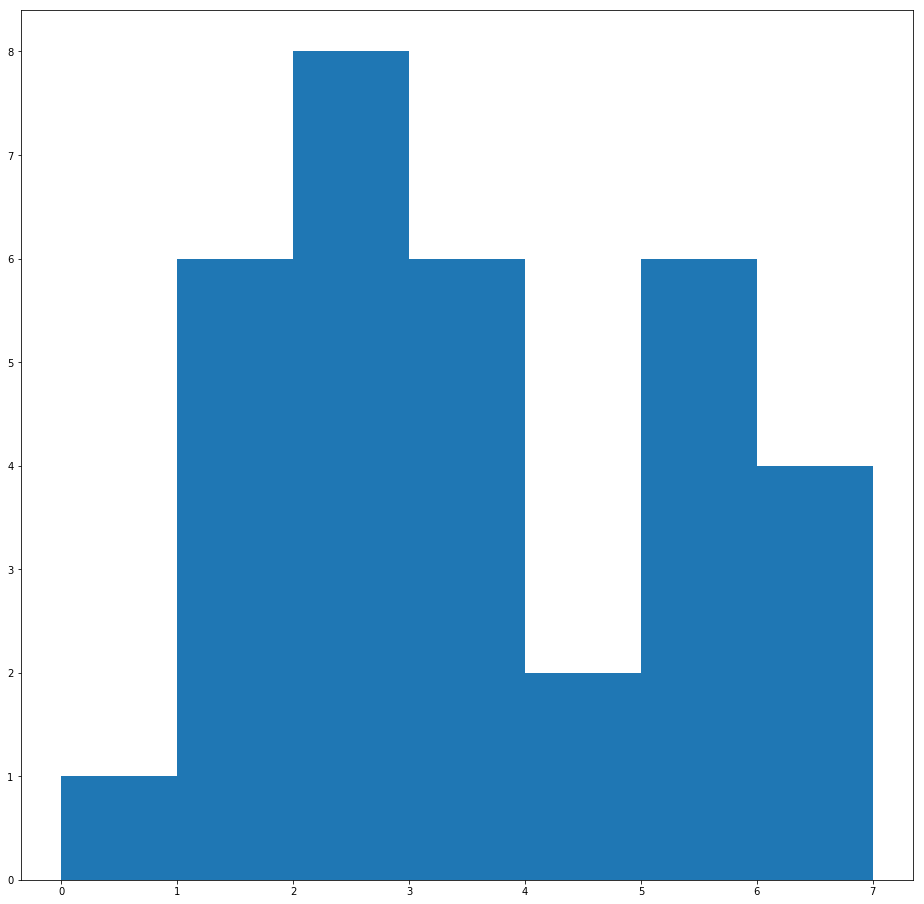

In [11]:
fig = plt.figure(figsize=(16,16))
n, bins, patches = plt.hist(f['hadro_data']['n_hadmultmeas'][:,0], bins=np.arange(8))
#fig.savefig('n-hadmultmeas_20160503.pdf')

In [12]:
ntot = np.sum(n)
print('n total = {}'.format(ntot))

for i in range(6):
    print('{} hadrons sum: {}'.format(i, n[i]))
    
for i in range(6):
    print('{} hadrons fraction: {}'.format(i, n[i] / ntot))

n total = 33.0
0 hadrons sum: 1.0
1 hadrons sum: 6.0
2 hadrons sum: 8.0
3 hadrons sum: 6.0
4 hadrons sum: 2.0
5 hadrons sum: 6.0
0 hadrons fraction: 0.030303030303
1 hadrons fraction: 0.181818181818
2 hadrons fraction: 0.242424242424
3 hadrons fraction: 0.181818181818
4 hadrons fraction: 0.0606060606061
5 hadrons fraction: 0.181818181818


(array([ 1.,  6.,  8.,  6.,  2.,  9.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

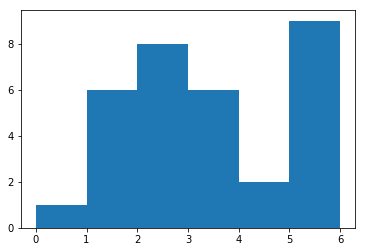

In [13]:
plt.hist(f['hadro_data']['n_hadmultmeas'][:,0], bins=np.arange(7))

(array([ 1.,  6.,  8.,  6.,  2.,  6.,  3.,  1.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

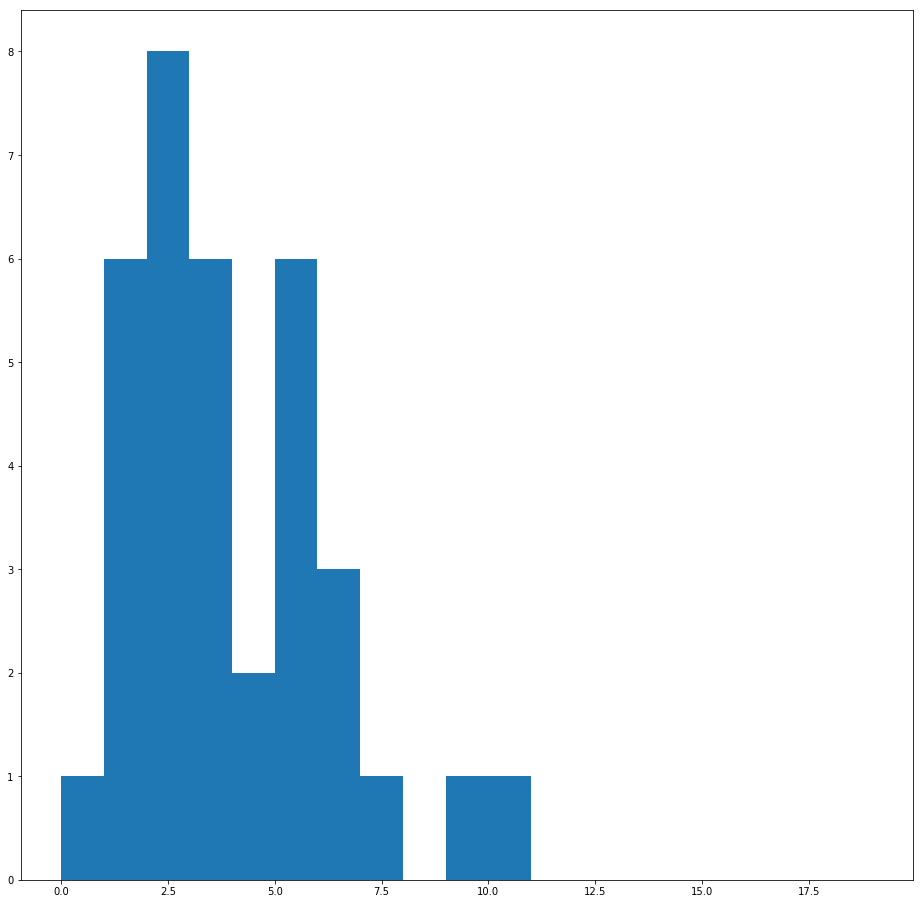

In [14]:
fig = plt.figure(figsize=(16,16))
plt.hist(f['hadro_data']['n_hadmultmeas'][:, 0], bins=np.arange(20))
#plt.yscale('log')
#fig.savefig('n-protons_20160503.pdf')

(array([ 10.,  16.,   4.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

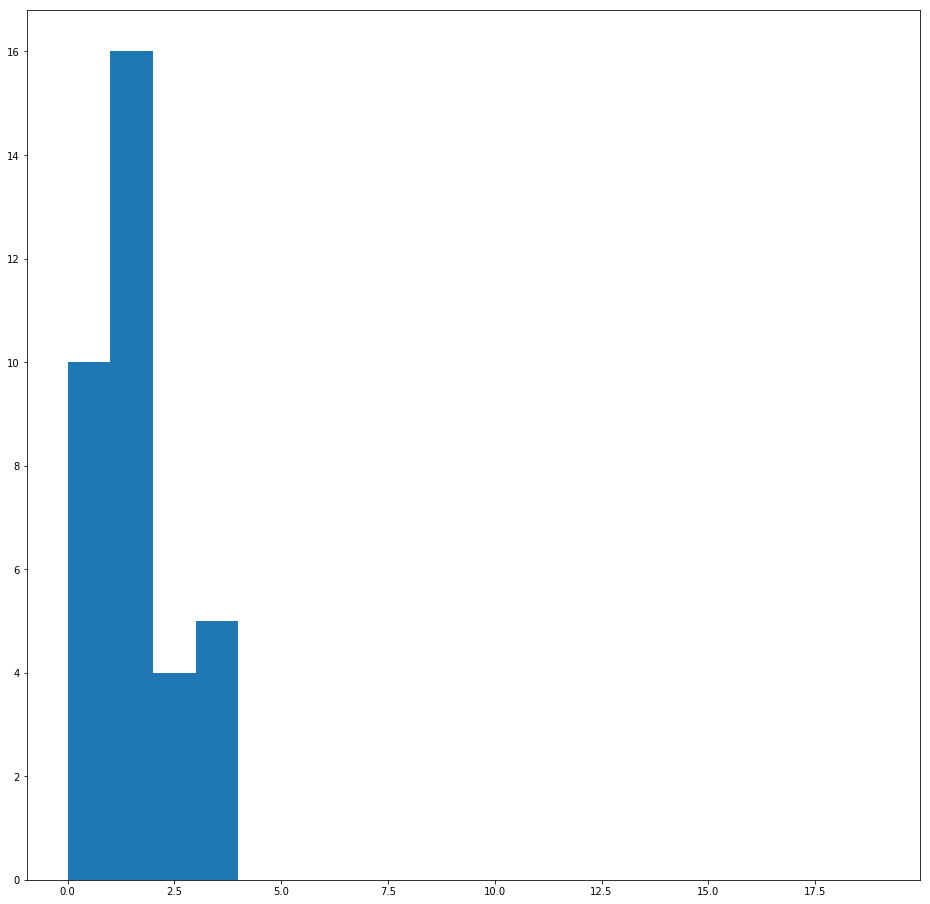

In [15]:
fig = plt.figure(figsize=(16,16))
# df['n-pions'].hist()
plt.hist(f['hadro_data']['n_chgdpions'][:, 0], bins=np.arange(20))
#plt.yscale('log')
#fig.savefig('n-pions_20160503.pdf')

(array([ 35.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

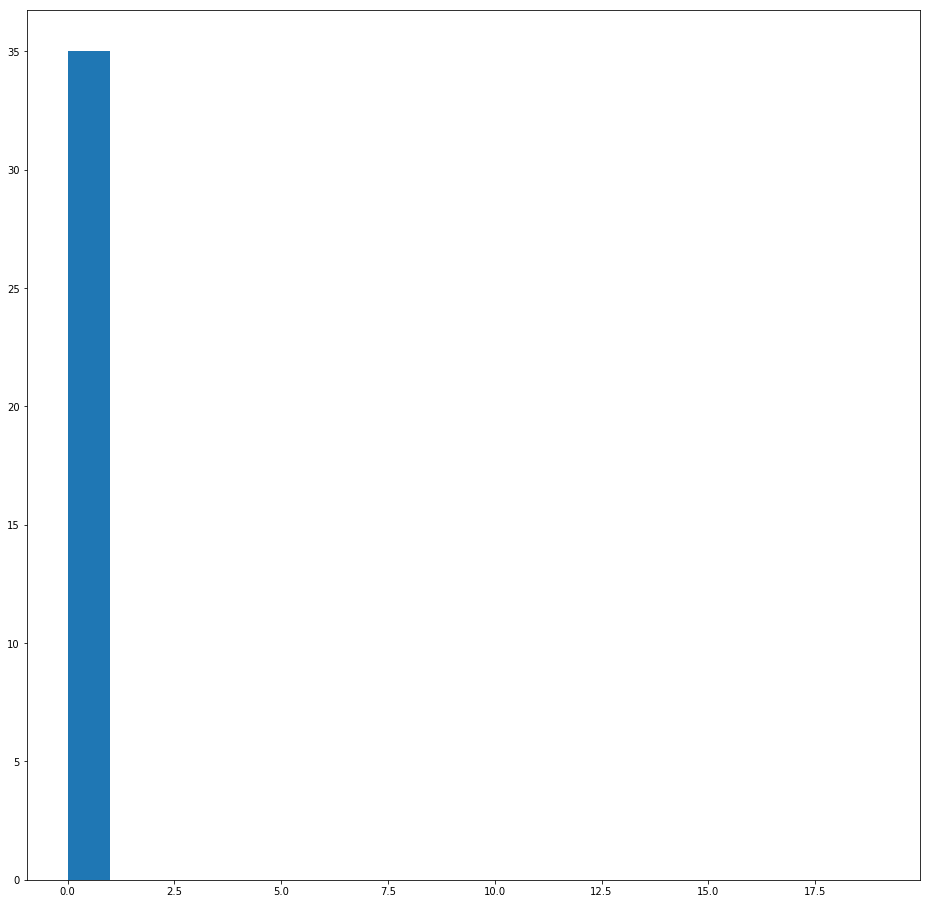

In [16]:
#df['n-kaons'].hist()
fig = plt.figure(figsize=(16,16))
plt.hist(f['hadro_data']['n_chgdkaons'][:, 0], bins=np.arange(20))
#plt.yscale('log')
#fig.savefig('n-kaons_20160503.pdf')

(array([  1.,   9.,  10.,   4.,   8.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

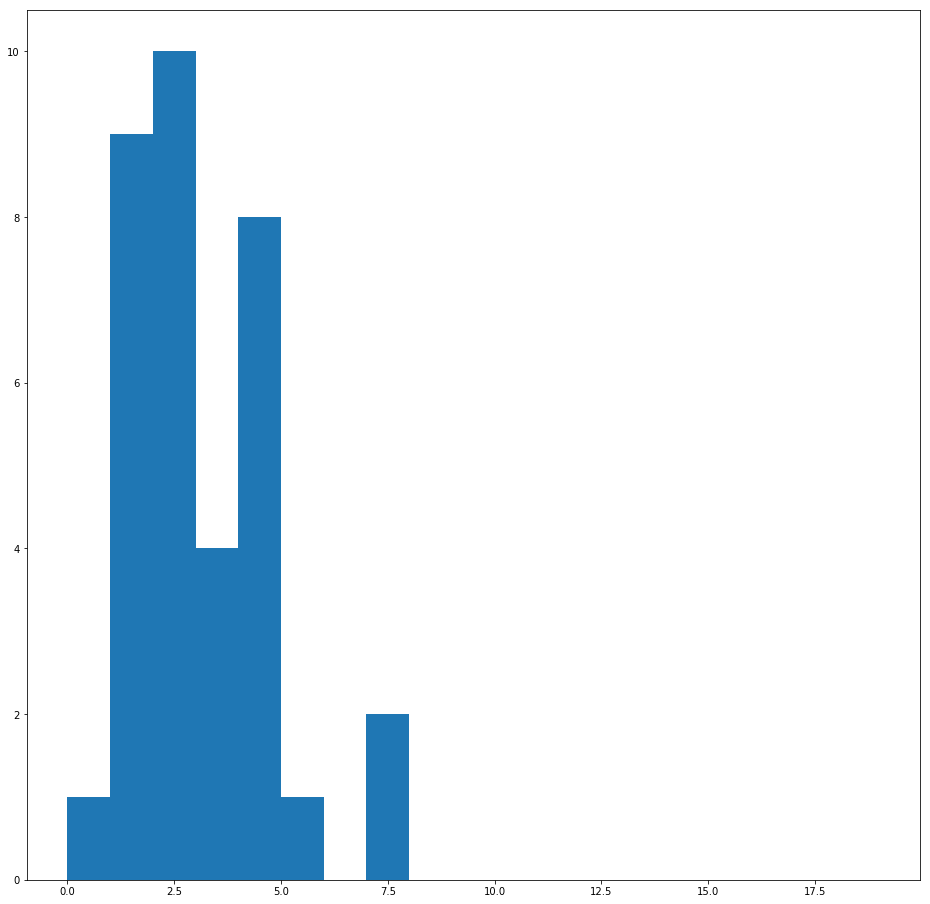

In [17]:
#(df['n-protons'] + df['n-pions'] + df['n-kaons']).hist()
fig = plt.figure(figsize=(16,16))
plt.hist(df['n-protons'] + df['n-pions'] + df['n-kaons'], bins=np.arange(20))
#plt.yscale('log')
#fig.savefig('n-hadrons-raw_20160503.pdf')

In [18]:
f.close()